<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Bayesian Modelling on Auto Data


---

In this lab you will get some practice building models with `pymc3`. Please reference the preceding lesson on estimation and regression with `pymc3` for tips on how to code these models up.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter('ignore')

### 1. Load the auto data. Perform any cleaning or EDA necessary.

In [2]:
auto = pd.read_csv('../../../../../resource-datasets/auto_stats/Auto.csv')

In [3]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
print(auto.horsepower.unique())
auto.horsepower = auto.horsepower.map(
    lambda x: np.nan if x == '?' else float(x))
auto.isnull().sum()

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [7]:
auto.dropna(inplace=True)

### 2. Create columns indicating if the car brand is from the USA, Asia, or Europe.

Take into account that some brand names are not given correctly.

In [8]:
auto['maker'] = auto.name.map(lambda x: x.split()[0])
auto['maker'].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
saab              4
subaru            4
opel              4
renault           3
chevy             3
maxda             2
cadillac          2
mercedes-benz     2
bmw               2
chevroelt         1
nissan            1
vokswagen         1
capri             1
triumph           1
hi                1
mercedes          1
toyouta           1
Name: maker, dtype: int64

In [9]:
replacements = {'chevroelt': 'chevrolet', 'chevy': 'chevrolet', 'vokswagen': 'volkswagen',
                'toyouta': 'toyota', 'maxda': 'mazda', 'mercedes-benz': 'mercedes', 'vw': 'volkswagen'}
auto['maker'] = auto.maker.replace(replacements)

In [10]:
auto = auto[(auto['maker'] != 'hi')]
auto['maker'].value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
opel           4
saab           4
subaru         4
mercedes       3
renault        3
bmw            2
cadillac       2
triumph        1
capri          1
nissan         1
Name: maker, dtype: int64

In [11]:
american = ['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge', 'mercury',
            'oldsmobile', 'chrysler', 'cadillac', 'capri']
euro = ['volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
        'opel', 'fiat', 'volvo', 'renault', 'mercedes', 'triumph']
asian = ['toyota', 'datsun', 'mazda', 'honda', 'subaru', 'nissan']

In [12]:
auto.origin.value_counts(normalize=True)

1    0.624041
3    0.202046
2    0.173913
Name: origin, dtype: float64

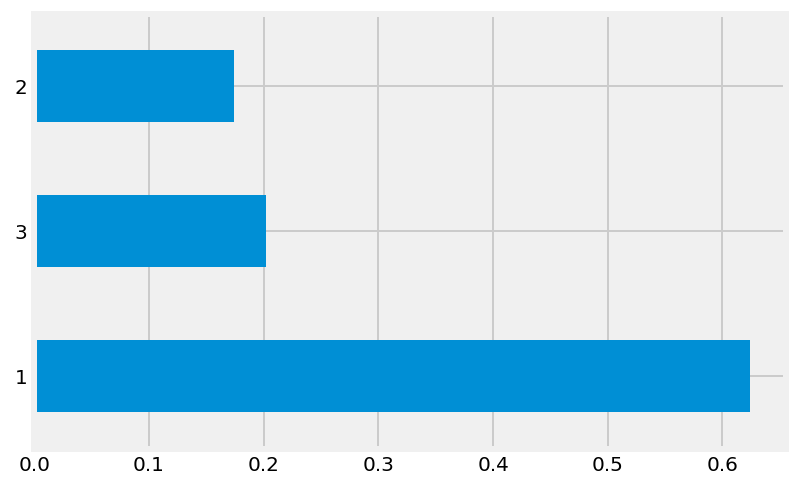

In [13]:
auto['origin'].value_counts(normalize=True).plot(kind='barh')
plt.show()

In [14]:
auto.groupby('origin')['maker'].get_group(1).unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'mercury', 'oldsmobile', 'chrysler', 'capri', 'cadillac'],
      dtype=object)

In [15]:
auto.groupby('origin')['maker'].get_group(2).unique()

array(['volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'opel', 'fiat',
       'volvo', 'renault', 'mercedes', 'triumph'], dtype=object)

In [16]:
auto.groupby('origin')['maker'].get_group(3).unique()

array(['toyota', 'datsun', 'mazda', 'honda', 'subaru', 'nissan'],
      dtype=object)

In [17]:
auto['american'] = auto.maker.map(lambda x: 1 if x in american else 0)
auto['euro'] = auto.maker.map(lambda x: 1 if x in euro else 0)
auto['asian'] = auto.maker.map(lambda x: 1 if x in asian else 0)

In [18]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,american,euro,asian
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.482864,5.465473,194.131714,104.242967,2973.097187,15.533760,75.994885,1.578005,0.624041,0.173913,0.202046
std,7.780610,1.703152,104.630650,38.278196,845.826366,2.758323,3.675975,0.806020,0.484990,0.379520,0.402041
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000
25%,17.250000,4.000000,105.000000,75.000000,2224.500000,13.750000,73.000000,1.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,264.500000,125.000000,3611.000000,17.000000,79.000000,2.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000


### 3. Build a model with `pymc3` to estimate the difference in MPG between American and European cars.

Make sure to inspect the results visually using `pymc3`'s built-in plotting functions.

When setting up likelihood and priors, you could choose
- a normal distribution for mpg itself 
- a normal distribution for the mean of mpg 
- a uniform distribution for the standard deviation of mpg

Check [conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior#cite_note-beta_rate-6) for other suggestions.

In [19]:
american_mpg = auto[auto.american == 1].mpg.values
european_mpg = auto[auto.euro == 1].mpg.values

print(american_mpg.mean(), european_mpg.mean())
print(american_mpg.std(), european_mpg.std())

20.078688524590163 27.602941176470587
6.401373181427647 6.53161926117945


In [20]:
import pymc3 as pm

In [21]:
prior_mean = auto.mpg.mean()
prior_std = auto.mpg.std()
print(prior_mean, prior_std)

23.482864450127874 7.780609558846925


In [22]:
from scipy import stats as stats

In [23]:
stats.ttest_ind(american_mpg, european_mpg, equal_var=False)

Ttest_indResult(statistic=-8.384230543719564, pvalue=2.4747150880777964e-13)

#### Using a uniform prior for the standard deviations

In [24]:
std_prior_lower = 0.00001
std_prior_upper = 10.

with pm.Model() as model:

    usa_mean = pm.Normal('usa_mean', prior_mean, sd=50)
    euro_mean = pm.Normal('euro_mean', prior_mean, sd=50)

    usa_std = pm.Uniform('usa_std', lower=std_prior_lower,
                         upper=std_prior_upper)
    euro_std = pm.Uniform(
        'euro_std', lower=std_prior_lower, upper=std_prior_upper)

    usa_mpg = pm.Normal('usa_mpg', mu=usa_mean,
                        sd=usa_std, observed=american_mpg)
    euro_mpg = pm.Normal('euro_mpg', mu=euro_mean,
                         sd=euro_std, observed=european_mpg)

    mean_delta = pm.Deterministic('mean_delta', usa_mean - euro_mean)
    std_delta = pm.Deterministic('std_delta', usa_std - euro_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / (usa_std**2/len(american_mpg)+euro_std**2/len(european_mpg))**0.5)

In [25]:
with model:

    trace = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [euro_std, usa_std, euro_mean, usa_mean]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:10<00:00, 1117.00draws/s]


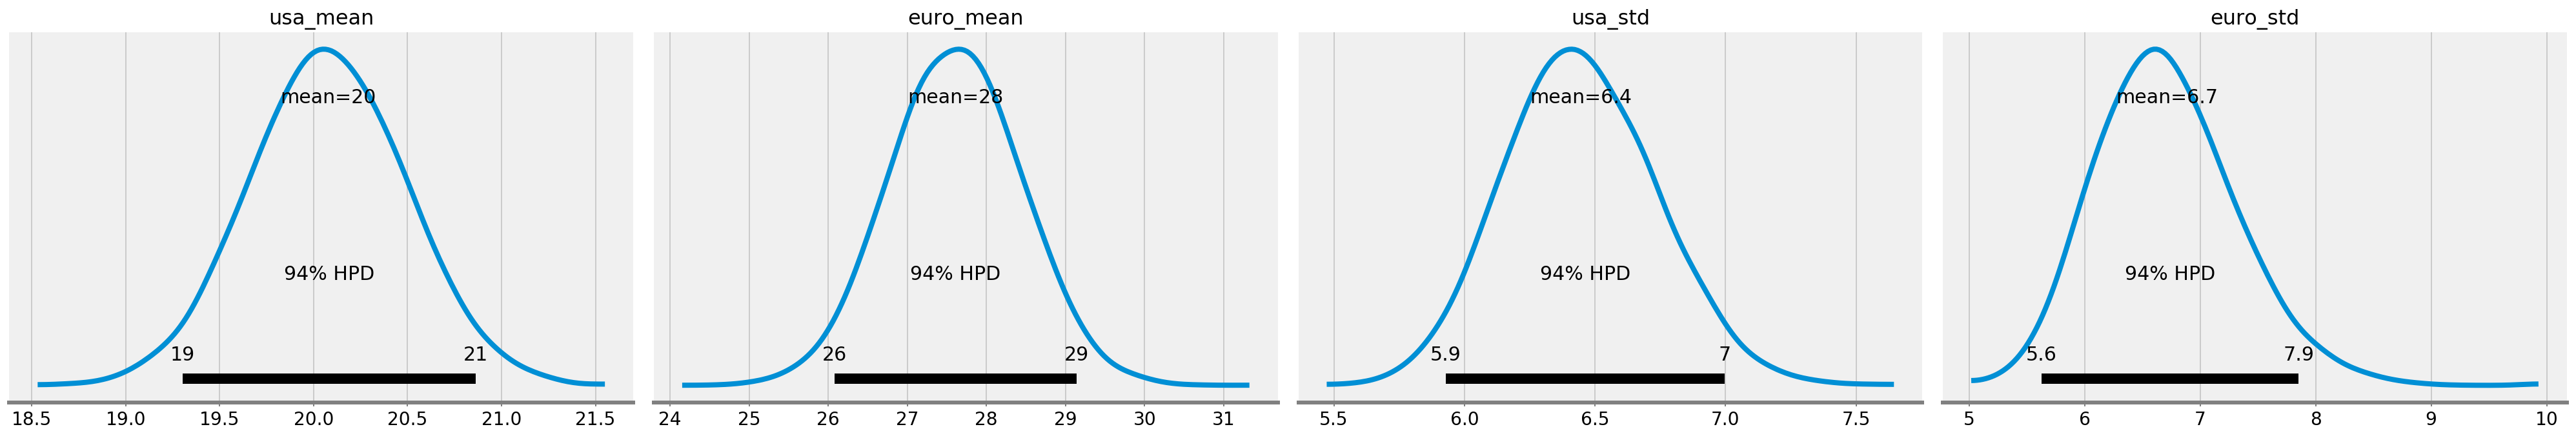

In [26]:
pm.plot_posterior(trace,
                  var_names=['usa_mean', 'euro_mean',
                            'usa_std', 'euro_std']
                  )
plt.show()

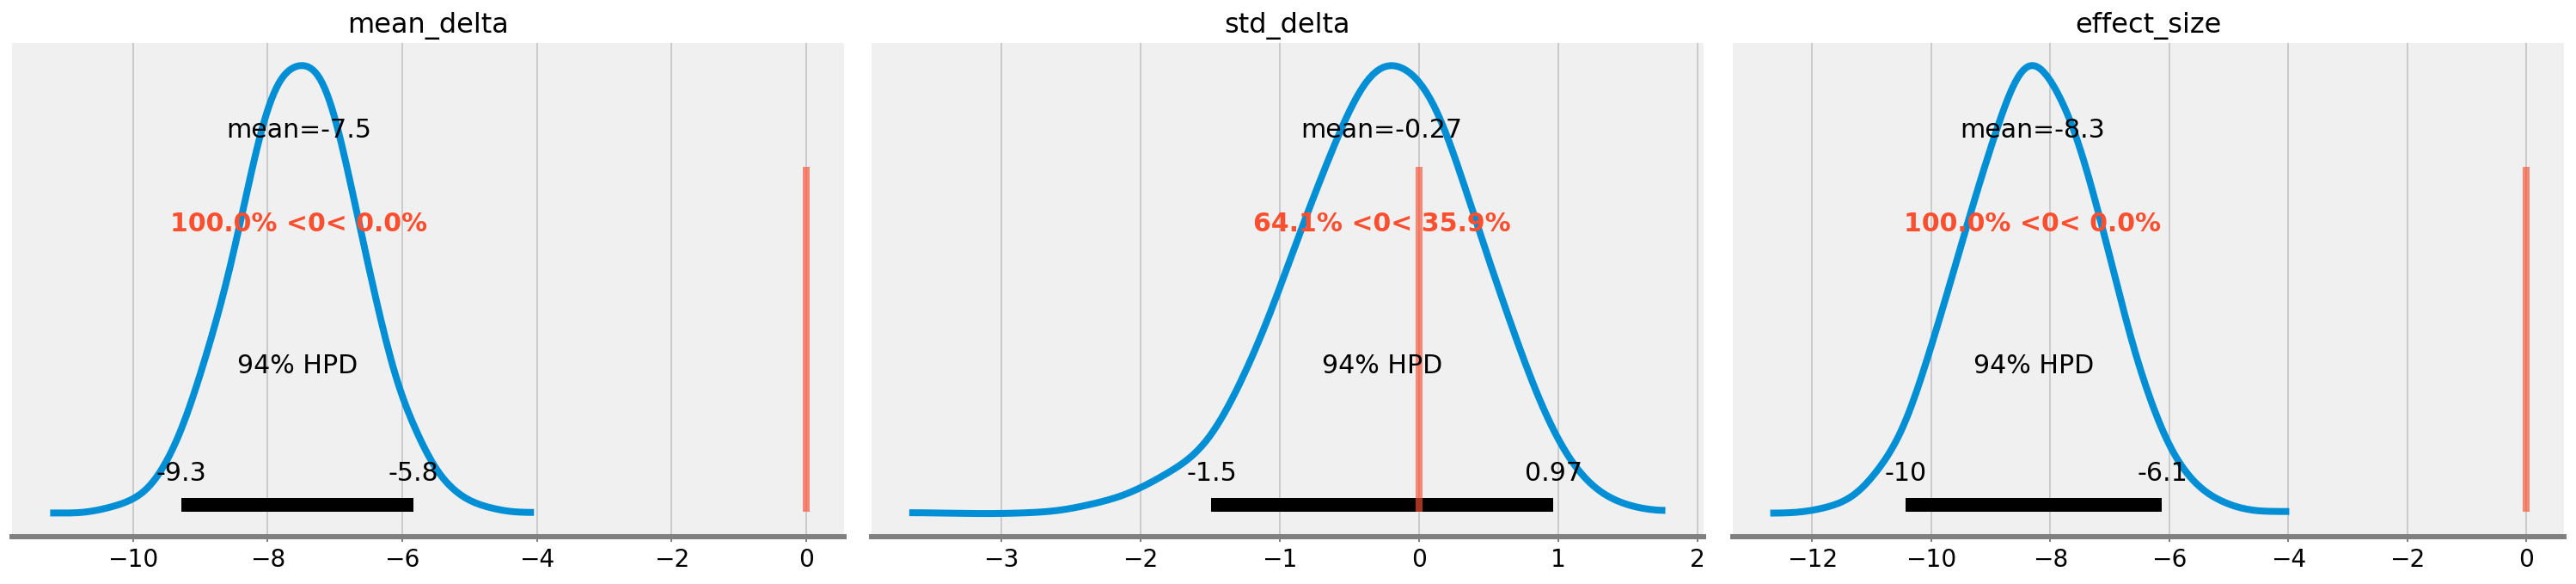

In [27]:
pm.plot_posterior(trace,
                  var_names=['mean_delta', 'std_delta', 'effect_size'],
                  ref_val=0)
plt.show()

### 4. Build a regression predicting MPG from predictors of your choice using `pymc3`.

Plot out the posterior distributions of your coefficients for your model.

Set up the distributions as in the lesson. For the regression coefficients you can choose normal distributions as a setup.

In [28]:
# discard origin, name, maker and asian (or any one of american, euro or asian)
from sklearn.preprocessing import StandardScaler
X = auto[['cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'year', 'american', 'euro']]


# Rescaling will allow us to use the same standard deviation for all
# the beta coefficient priors

scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

In [29]:
with pm.Model() as reg:

    sd_start = 60.

    mpg_std = pm.Uniform('error_std', lower=0.0001, upper=sd_start)
    #mpg_std = pm.HalfCauchy('error_std',beta=10)
    # could also use pm.HalfCauchy('error_std',beta=10) here
    # could also use Flat prior for intercept
    #intercept = pm.Flat('intercept')#
    intercept = pm.Normal('intercept', mu=0., sd=sd_start)
    cyl_beta = pm.Normal('cyl_beta', mu=0., sd=sd_start)
    disp_beta = pm.Normal('disp_beta', mu=0., sd=sd_start)
    horse_beta = pm.Normal('horse_beta', mu=0., sd=sd_start)
    weight_beta = pm.Normal('weight_beta', mu=0., sd=sd_start)
    acc_beta = pm.Normal('acc_beta', mu=0., sd=sd_start)
    year_beta = pm.Normal('year_beta', mu=0., sd=sd_start)
    usa_beta = pm.Normal('usa_beta', mu=0., sd=sd_start)
    euro_beta = pm.Normal('euro_beta', mu=0., sd=sd_start)
    
    E_mpg = pm.Normal('y_mean',
                      mu=(intercept +
                          Xs.cylinders.values * cyl_beta +
                          Xs.displacement.values * disp_beta +
                          Xs.horsepower.values * horse_beta +
                          Xs.weight.values * weight_beta +
                          Xs.acceleration.values * acc_beta +
                          Xs.year.values * year_beta +
                          Xs.american.values * usa_beta +
                          Xs.euro.values * euro_beta  # +
                          #Xs.asian.values * asian_beta
                          ),
                      sd=mpg_std, observed=auto.mpg.values)

In [30]:
with reg:
    trace_reg = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [euro_beta, usa_beta, year_beta, acc_beta, weight_beta, horse_beta, disp_beta, cyl_beta, intercept, error_std]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:46<00:00, 257.64draws/s]


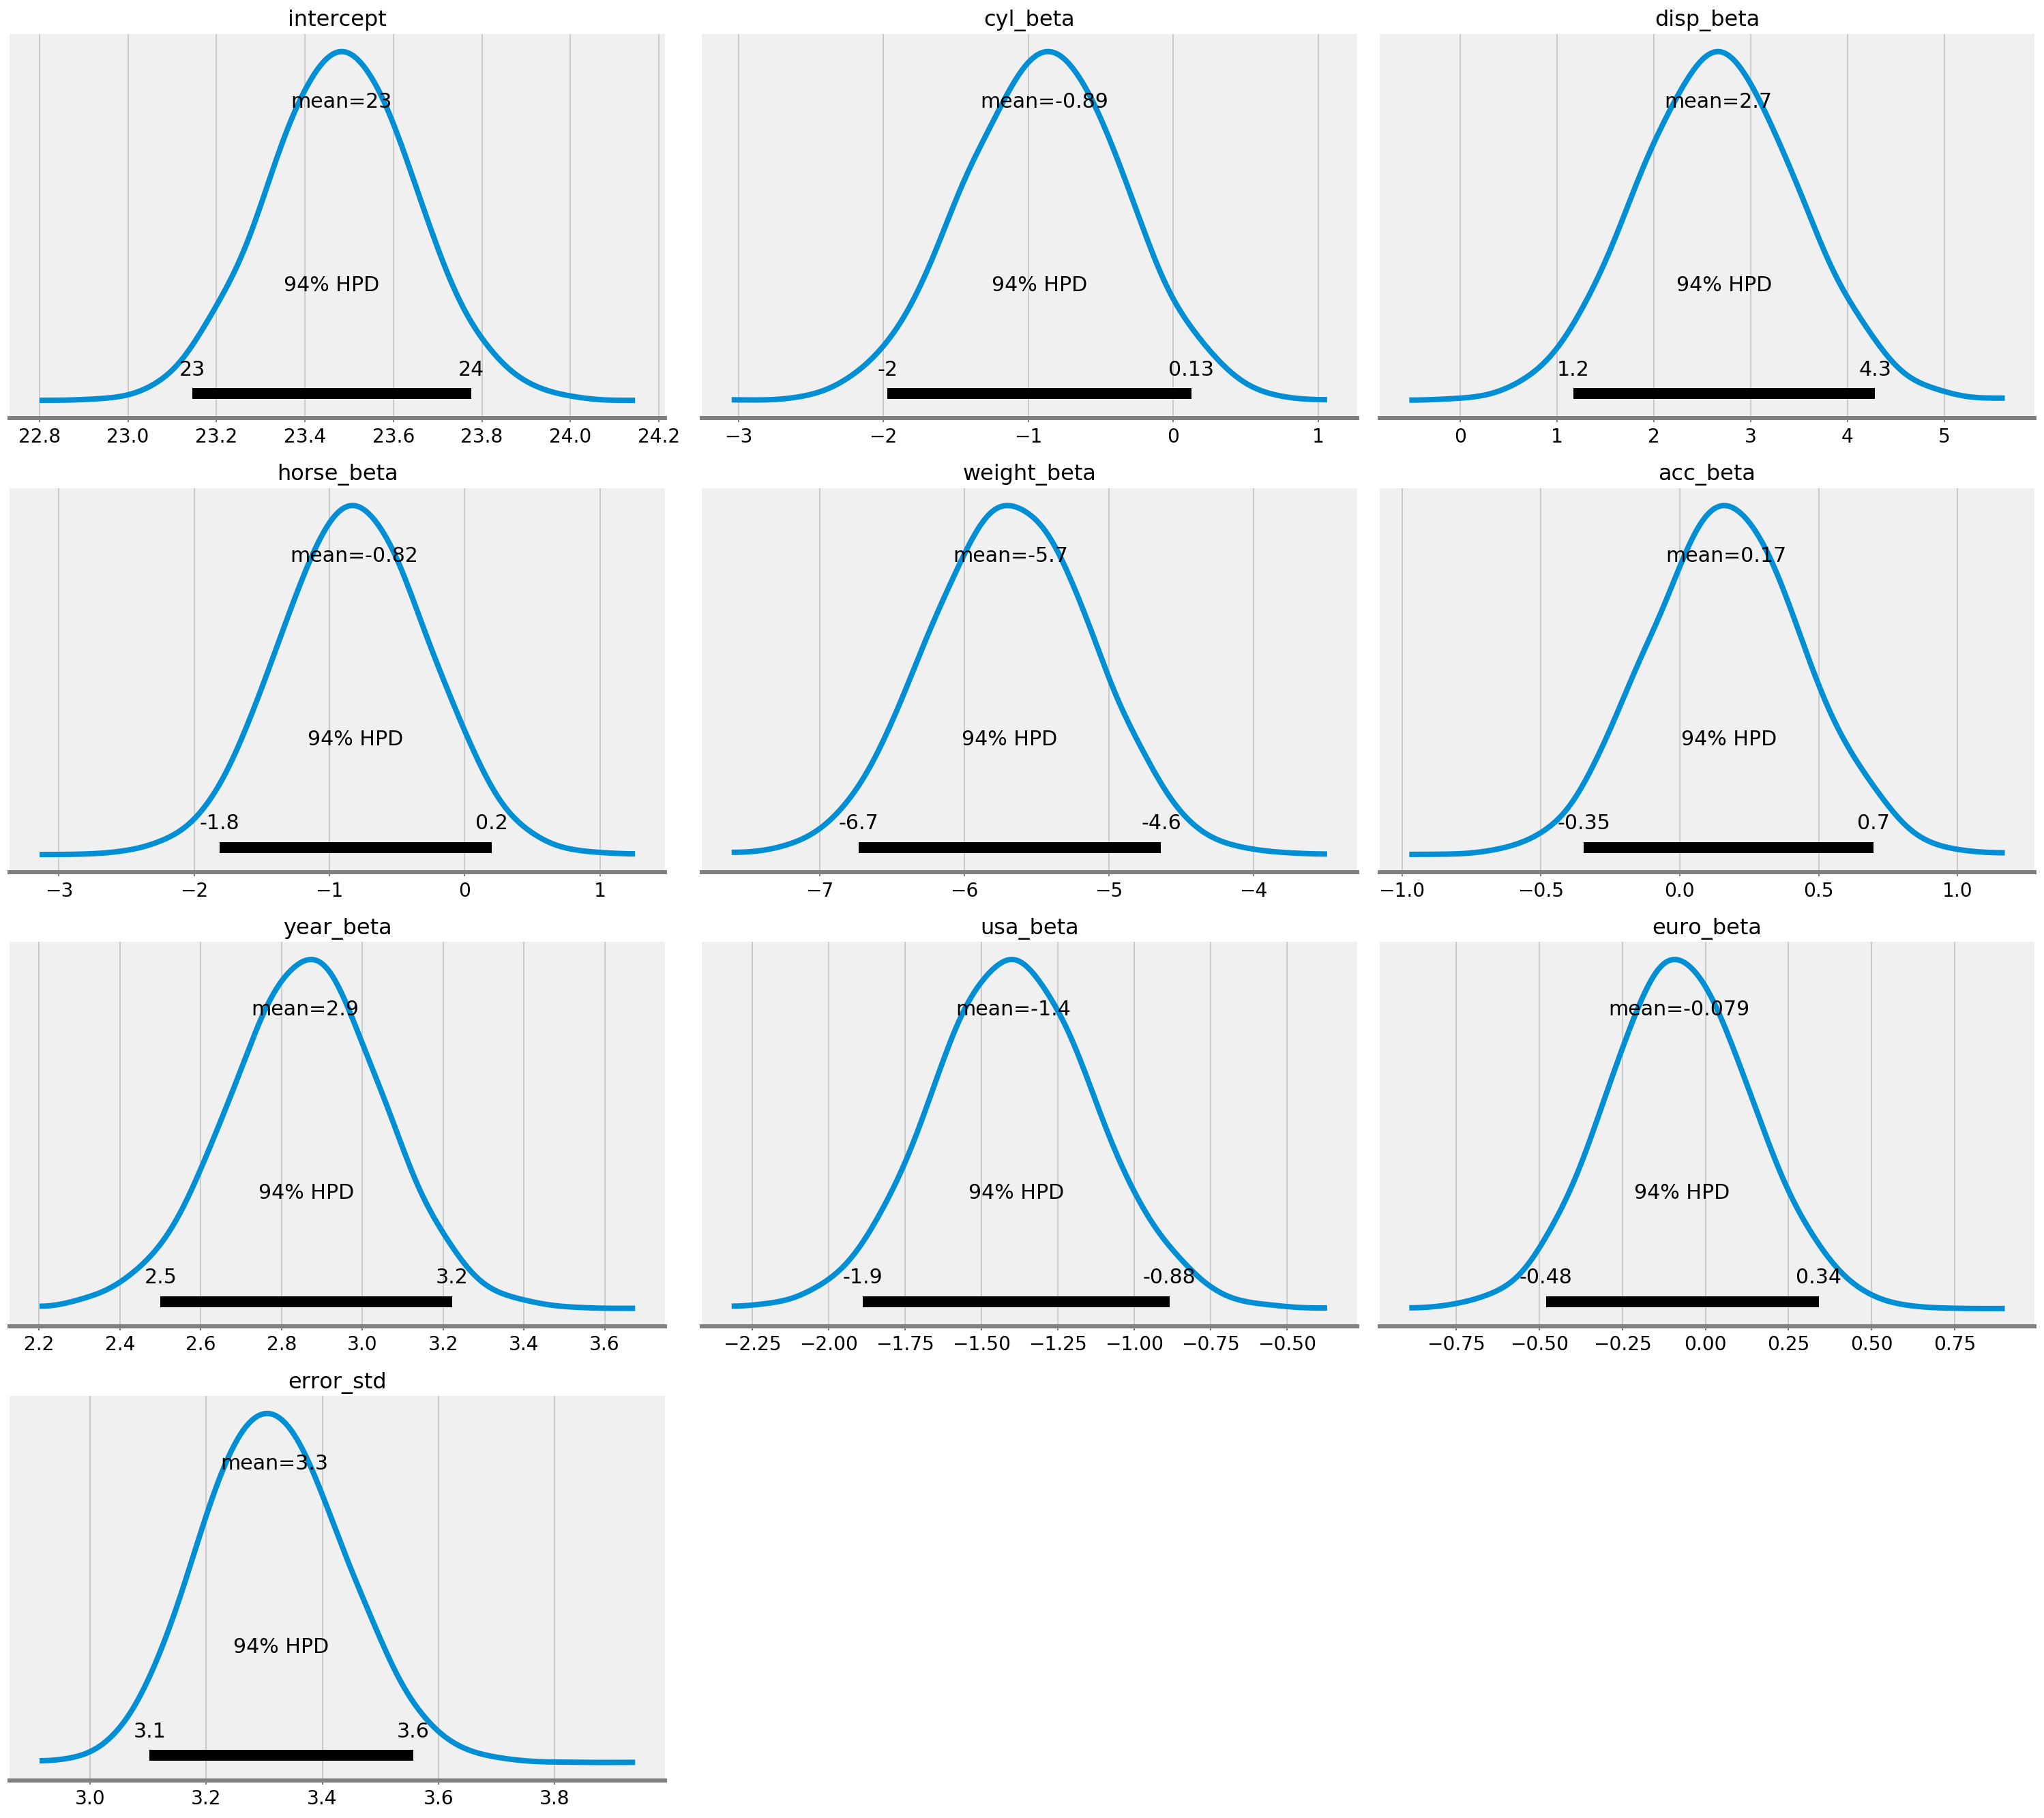

In [31]:
pm.plot_posterior(trace_reg)
plt.show()

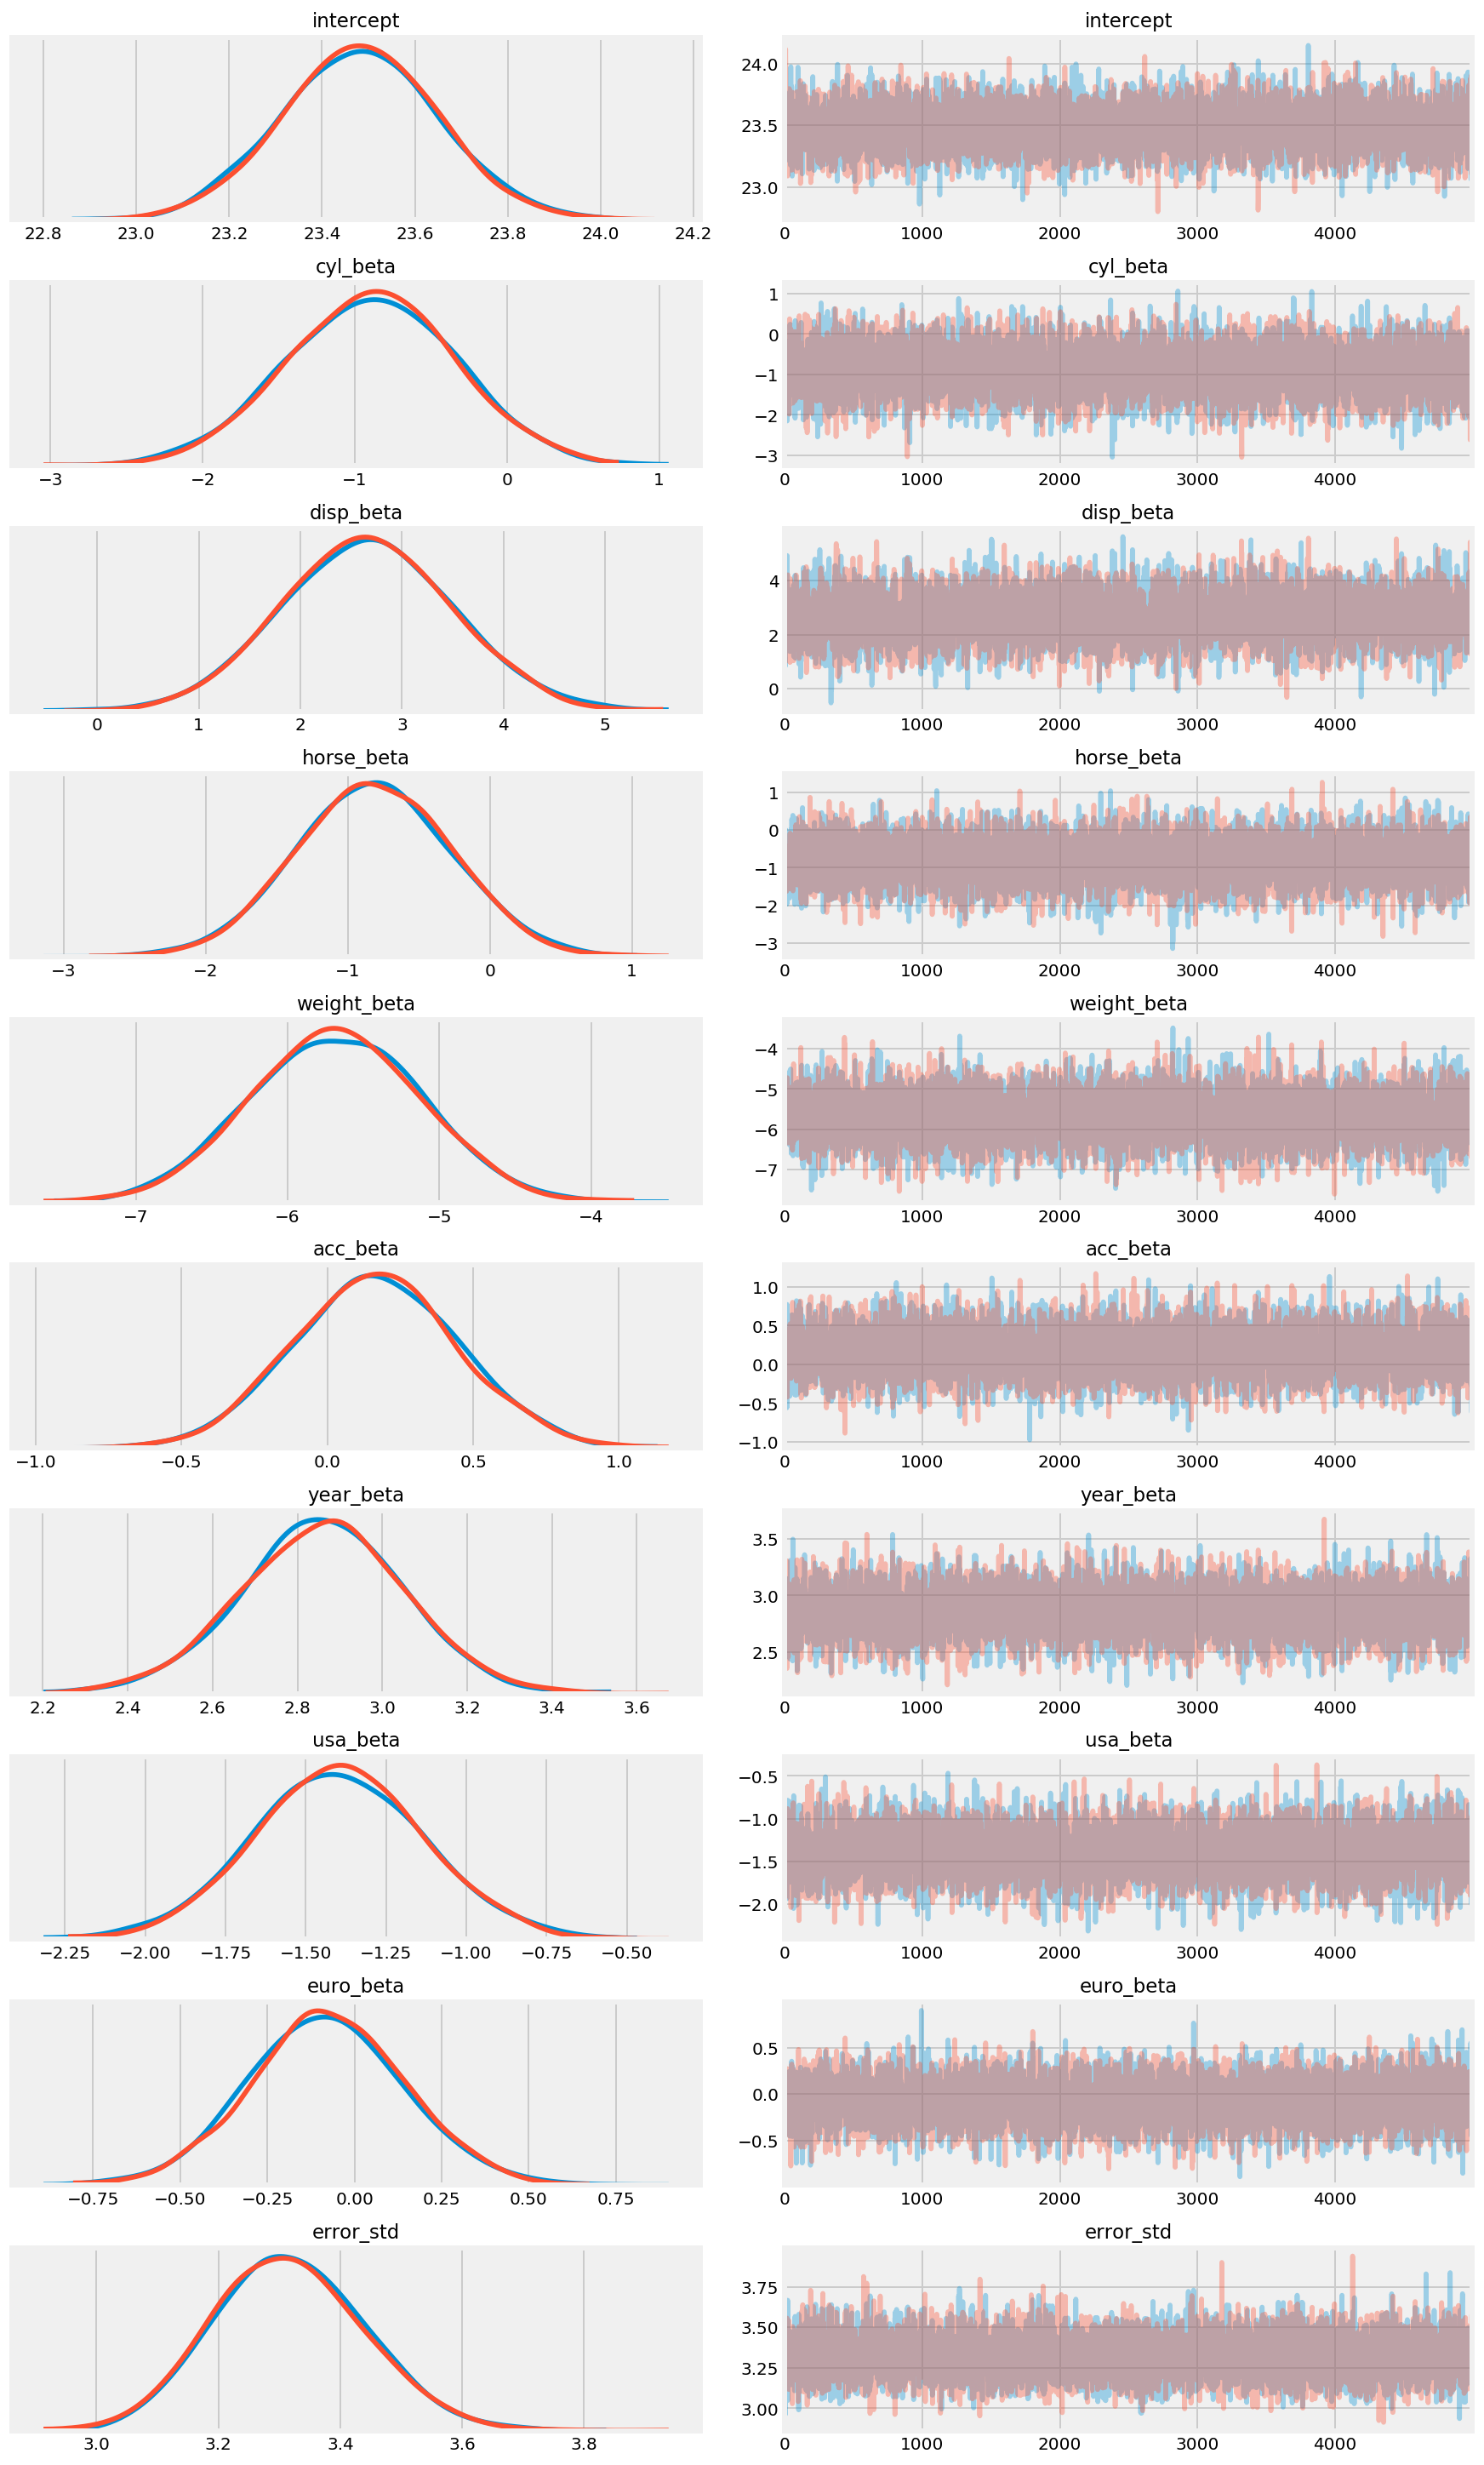

In [32]:
pm.traceplot(trace_reg)
plt.show()

In [33]:
reg_summary = pm.summary(trace_reg)
reg_summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,23.482,0.167,23.146,23.775,0.002,0.001,9261.0,9259.0,9276.0,7310.0,1.0
cyl_beta,-0.891,0.554,-1.970,0.126,0.007,0.005,6473.0,6033.0,6472.0,6433.0,1.0
disp_beta,2.661,0.835,1.164,4.284,0.011,0.008,5723.0,5546.0,5730.0,6324.0,1.0
horse_beta,-0.818,0.542,-1.813,0.198,0.007,0.005,6268.0,5806.0,6281.0,6811.0,1.0
weight_beta,-5.679,0.562,-6.731,-4.638,0.007,0.005,6472.0,6429.0,6471.0,6959.0,1.0
acc_beta,0.167,0.279,-0.345,0.699,0.003,0.003,6763.0,6223.0,6768.0,7385.0,1.0
year_beta,2.859,0.192,2.500,3.222,0.002,0.001,8599.0,8599.0,8619.0,7115.0,1.0
usa_beta,-1.396,0.265,-1.888,-0.885,0.003,0.002,7124.0,7088.0,7124.0,7193.0,1.0
euro_beta,-0.079,0.219,-0.481,0.341,0.003,0.002,7646.0,6659.0,7655.0,7336.0,1.0
error_std,3.317,0.122,3.102,3.556,0.001,0.001,8506.0,8491.0,8514.0,7610.0,1.0


In [34]:
reg.model

In [35]:
preds = pm.sample_posterior_predictive(trace_reg, model=reg)

print(preds['y_mean'].shape)

100%|██████████| 10000/10000 [00:15<00:00, 633.19it/s]

(10000, 391)


In [36]:
# averaging over all samples allows to calculate the usual R2 score
from sklearn import metrics
metrics.r2_score(auto.mpg, preds['y_mean'].mean(axis=0))

0.8229990078133405

In [37]:
pm.r2_score(auto.mpg, preds['y_mean'].mean(axis=0))

r2        0.822848
r2_std    0.000000
dtype: float64

#### Compare to sklearn

In [38]:
Xs.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
american        0
euro            0
dtype: int64

In [39]:
from sklearn.linear_model import LinearRegression, BayesianRidge

lr = LinearRegression()

In [40]:
X = Xs.dropna()

In [41]:
auto.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 391, dtype: float64

In [42]:
cols = [x for x in Xs.columns if x != 'mpg']
y = auto.mpg
X = X[cols]

In [43]:
lr.fit(X, y)
print(lr.intercept_, list(zip(cols, lr.coef_)))

23.482864450127874 [('cylinders', -0.8820215875630819), ('displacement', 2.645887865450772), ('horsepower', -0.8074701411996991), ('weight', -5.683233597657467), ('acceleration', 0.16926401611427336), ('year', 2.862240023743503), ('american', -1.3945171746213179), ('euro', -0.07935932248332969)]


In [44]:
lr.score(X, y)

0.823058983888965

#### Compare results to sklearn

In [45]:
np.around(lr.coef_ - reg_summary['mean'].values[1:-1], 2)

array([ 0.01, -0.02,  0.01, -0.  ,  0.  ,  0.  ,  0.  , -0.  ])

### Using the vectorial formulation

In [46]:
with pm.Model() as model_vec:
    sd_start = 60.
    mpg_std = pm.Uniform('error_std', lower=0.0001, upper=sd_start)
    intercept = pm.Normal('intercept', mu=0., sd=sd_start)
    beta = pm.Normal('beta', mu=0., sd=sd_start, shape=8)
    E_mpg = pm.Normal('y_mean',
                      mu=intercept+pm.math.dot(Xs, beta),
                      sd=mpg_std, 
                      observed=auto.mpg.values)

In [47]:
with model_vec:
    trace_vec = pm.sample(draws=5000, tune=1500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, intercept, error_std]
Sampling 2 chains, 0 divergences: 100%|██████████| 13000/13000 [00:29<00:00, 434.99draws/s]


In [48]:
pm.summary(trace_reg)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,23.482,0.167,23.146,23.775,0.002,0.001,9261.0,9259.0,9276.0,7310.0,1.0
cyl_beta,-0.891,0.554,-1.970,0.126,0.007,0.005,6473.0,6033.0,6472.0,6433.0,1.0
disp_beta,2.661,0.835,1.164,4.284,0.011,0.008,5723.0,5546.0,5730.0,6324.0,1.0
horse_beta,-0.818,0.542,-1.813,0.198,0.007,0.005,6268.0,5806.0,6281.0,6811.0,1.0
weight_beta,-5.679,0.562,-6.731,-4.638,0.007,0.005,6472.0,6429.0,6471.0,6959.0,1.0
acc_beta,0.167,0.279,-0.345,0.699,0.003,0.003,6763.0,6223.0,6768.0,7385.0,1.0
year_beta,2.859,0.192,2.500,3.222,0.002,0.001,8599.0,8599.0,8619.0,7115.0,1.0
usa_beta,-1.396,0.265,-1.888,-0.885,0.003,0.002,7124.0,7088.0,7124.0,7193.0,1.0
euro_beta,-0.079,0.219,-0.481,0.341,0.003,0.002,7646.0,6659.0,7655.0,7336.0,1.0
error_std,3.317,0.122,3.102,3.556,0.001,0.001,8506.0,8491.0,8514.0,7610.0,1.0


In [49]:
pm.summary(trace_vec)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,23.484,0.167,23.174,23.806,0.002,0.001,10170.0,10170.0,10173.0,6843.0,1.0
beta[0],-0.885,0.547,-1.903,0.148,0.007,0.005,6758.0,6528.0,6763.0,6870.0,1.0
beta[1],2.660,0.805,1.181,4.186,0.010,0.007,6091.0,6072.0,6090.0,6597.0,1.0
beta[2],-0.806,0.540,-1.827,0.192,0.007,0.005,6317.0,5998.0,6313.0,6874.0,1.0
beta[3],-5.691,0.555,-6.728,-4.634,0.007,0.005,6333.0,6305.0,6344.0,6991.0,1.0
beta[4],0.170,0.278,-0.364,0.683,0.003,0.002,6521.0,6515.0,6530.0,6812.0,1.0
beta[5],2.868,0.193,2.511,3.229,0.002,0.002,8062.0,7982.0,8075.0,7009.0,1.0
beta[6],-1.393,0.267,-1.918,-0.911,0.003,0.002,7024.0,6867.0,7033.0,6814.0,1.0
beta[7],-0.075,0.215,-0.478,0.325,0.003,0.002,6623.0,5261.0,6634.0,6888.0,1.0
error_std,3.317,0.122,3.078,3.532,0.001,0.001,7769.0,7753.0,7772.0,6708.0,1.0


In [50]:
pm.summary(trace_reg)['mean'].values-pm.summary(trace_vec)['mean'].values

array([-0.002, -0.006,  0.001, -0.012,  0.012, -0.003, -0.009, -0.003,
       -0.004,  0.   ])